In [120]:
RESULT_DIR = "/Users/niko/Downloads/results"

In [121]:
import os
import json

In [122]:
files = os.listdir(RESULT_DIR)
files = [f for f in files if f.endswith(".json")]

with open(os.path.join(RESULT_DIR, files[0]), "r") as f:
    final = json.load(f)

with open(os.path.join(RESULT_DIR, files[1]), "r") as f:
    partials = json.load(f)

In [123]:
partials

[{'result': {'result': [{'conf': 0.24585,
     'start': 0.27,
     'end': 0.87,
     'word': 'そ'},
    {'conf': 0.487549, 'start': 0.87, 'end': 0.97, 'word': 'く'}],
   'text': 'そ く'},
  'window': [0.0, 1.0],
  'observation_time': 1.900297911837697},
 {'result': {'result': [{'conf': 0.991699,
     'start': 0.27,
     'end': 1.21,
     'word': 'Socrates'},
    {'conf': 0.984375, 'start': 1.21, 'end': 1.63, 'word': 'begins'},
    {'conf': 0.947754, 'start': 1.63, 'end': 1.91, 'word': 'the'},
    {'conf': 0.273682, 'start': 1.91, 'end': 1.97, 'word': 'teaching.'}],
   'text': 'Socrates begins the teaching.'},
  'window': [0.0, 2.0],
  'observation_time': 2.3536197785288095},
 {'result': {'result': [{'conf': 0.50433,
     'start': 0.27,
     'end': 1.19,
     'word': 'socrates'},
    {'conf': 0.993164, 'start': 1.19, 'end': 1.63, 'word': 'begins'},
    {'conf': 0.977051, 'start': 1.63, 'end': 1.91, 'word': 'the'},
    {'conf': 0.828613, 'start': 1.91, 'end': 2.49, 'word': 'timaeus'},
    {'

In [124]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/p7/4nxjn99934d1y7rk0mh96_300000gn/T/ipykernel_57853/781342344.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(Rectangle(


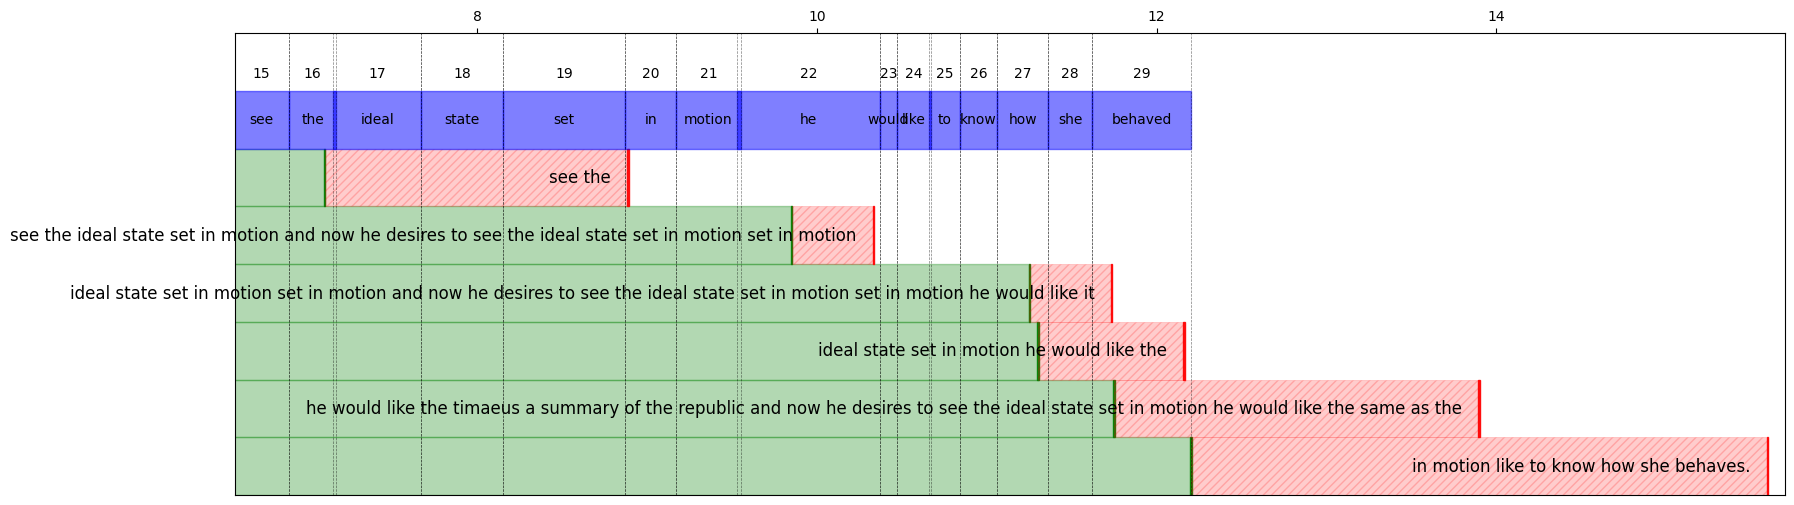

In [140]:
from matplotlib.patches import Rectangle

window_start = 15
window_end = 30

words = final[window_start:window_end]

window_start_t = min(word["start"] for word in words)
window_end_t = max(word["end"] for word in words)
window_width = window_end_t - window_start_t

# Filter predictions by window[1]
predictions = [p for p in partials if window_start_t <= p["window"][1] <= window_end_t]
predictions = predictions[::-1]

# Determine max observation time for axis limit
if predictions:
    max_obs_time = max(p["observation_time"] for p in predictions)
else:
    max_obs_time = window_end_t

fig, ax = plt.subplots(figsize=(20, 6))

for i, partial in enumerate(predictions):
    win_start, win_end = partial["window"]
    obs_time = partial["observation_time"]

    # Green prediction window
    ax.add_patch(Rectangle((win_start, i), win_end - win_start, 1, color="green", alpha=0.3))

    # Green bar at window[1]
    marker_width = 0.01
    ax.add_patch(Rectangle((win_end - marker_width / 2, i), marker_width, 1, color="green", alpha=0.9))

    # Schraffierte red delay box (if delay exists)
    if obs_time > win_end:
        ax.add_patch(Rectangle(
            (win_end, i), obs_time - win_end, 1,
            color="red", alpha=0.2, hatch='////', edgecolor="red", linewidth=0.5, fill=True
        ))

    # Red bar at observation time
    ax.add_patch(Rectangle((obs_time - marker_width / 2, i), marker_width, 1, color="red", alpha=0.9))

    # Construct visible prediction text
    visible_words = [
        w["word"] for w in partial["result"]["result"]
        if window_start_t <= w["start"] <= window_end_t
    ]
    text = " ".join(visible_words)

    # Text placement
    is_left_third = (obs_time - window_start_t) < (window_width / 3)
    if is_left_third:
        ax.text(obs_time + 0.1, i + 0.5, text, ha="left", va="center", fontsize=12)
    else:
        ax.text(obs_time - 0.1, i + 0.5, text, ha="right", va="center", fontsize=12)

# Draw words (blue, top layer)
word_y = len(predictions)
for i, word in enumerate(words):
    start = word["start"]
    end = word["end"]
    ax.add_patch(Rectangle((start, word_y), end - start, 1, color="blue", alpha=0.5))
    ax.text((start + end) / 2, word_y + 0.5, word["word"], ha="center", va="center", fontsize=10)
    ax.text((start + end) / 2, word_y + 1.3, f"{window_start + i}", ha="center", va="center", fontsize=10, color="black")
    ax.axvline(start, color="black", linestyle="--", linewidth=0.5, alpha=0.5)
    ax.axvline(end, color="black", linestyle="--", linewidth=0.5, alpha=0.5)

# Axes setup
ax.set_xlim(window_start_t, max_obs_time +.1)
ax.set_ylim(0, word_y + 2)
ax.set_yticks([])
ax.xaxis.tick_top()

plt.show()

In [ ]:
partials[9]

{'result': {'result': [{'conf': 0.991211,
    'start': 7.6,
    'end': 8.36,
    'word': 'and'},
   {'conf': 0.99707, 'start': 8.36, 'end': 8.94, 'word': 'sweep'},
   {'conf': 0.998535, 'start': 8.94, 'end': 9.44, 'word': 'and'},
   {'conf': 1e-06, 'start': 9.44, 'end': 9.64, 'word': 'sweep'},
   {'conf': 0.830566, 'start': 9.64, 'end': 9.64, 'word': 'and'},
   {'conf': 0.000307, 'start': 9.64, 'end': 9.72, 'word': 'sweep'},
   {'conf': 0.622559, 'start': 9.72, 'end': 9.84, 'word': 'and'},
   {'conf': 0.045868, 'start': 9.84, 'end': 9.84, 'word': 'sweep'},
   {'conf': 0.637207, 'start': 9.84, 'end': 9.94, 'word': 'and'},
   {'conf': 0.147705, 'start': 9.94, 'end': 9.94, 'word': 'sweep'},
   {'conf': 0.666992, 'start': 9.94, 'end': 9.94, 'word': 'and'},
   {'conf': 0.249023, 'start': 9.94, 'end': 9.94, 'word': 'sweep'},
   {'conf': 0.689453, 'start': 9.94, 'end': 9.94, 'word': 'and'},
   {'conf': 0.339355, 'start': 9.94, 'end': 9.94, 'word': 'sweep'},
   {'conf': 0.706055, 'start': 9.94

In [ ]:
def word_first_correct_response(final_index, acceptance_time=1.0):
    '''
    Given the index of a final word, return the first partial response that contains the word
    and the time it was produced.
    '''
    target_word = final[final_index]
    word_start = target_word["start"]
    word_end = target_word["end"]
    word = target_word["word"]
    for i, partial in enumerate(partials):
        if partial["time"] < word_start:
            continue
        for w in partial["result"]["result"]:
            if w["word"] == word and w["start"] >= word_start - acceptance_time and w["end"] <= word_end + acceptance_time:
                return {
                    "timestep": i,
                    "observation_time": partial["time"],
                    "latency": partial["time"] - word_start,
                }

def word_first_final_response(final_index, acceptance_time=1.0):
    '''
    Given the index of a final word, return the partial response after which the word does not change anymore and thus becomes final.
    '''
    target_word = final[final_index]
    word_start = target_word["start"]
    word_end = target_word["end"]
    word = target_word["word"]
    last_found_at_index = None
    candidate = None
    for i, partial in enumerate(partials):
        if partial["time"] < word_start:
            continue
        if (len(partial["result"]["result"])
            and partial["result"]["result"][0]["start"] > word_end + acceptance_time
        ):
            return candidate
        for w in partial["result"]["result"]:
            if w["word"] == word and w["start"] >= word_start - acceptance_time and w["end"] <= word_end + acceptance_time:
                last_found_at_index = i
                if (
                    candidate is None
                    or last_found_at_index < i-1 
                ):
                    candidate = {
                        "timestep": i,
                        "observation_time": partial["time"],
                        "latency": partial["time"] - word_start,
                    }
    return candidate
        
            

wfc = [word_first_correct_response(i) for i in range(len(final))]
wfc_latency = np.array([r["latency"] for r in wfc])

ffc = [word_first_final_response(i) for i in range(len(final))]
ffc_latency = np.array([r["latency"] for r in ffc])

In [ ]:
ffc_latency.mean().item()

2.0420164100480522

In [ ]:
word_first_correct_response(282)

{'timestep': 211,
 'observation_time': 132.54516133666039,
 'latency': 7.3851613366603885}

In [ ]:
word_first_final_response(0)

{'timestep': 1,
 'observation_time': 2.3482836354523897,
 'latency': 2.04828363545239}

In [ ]:
wfc_latency.mean().item()

2.0420164100480522